In [123]:
import pandas as pd

In [125]:
orders = pd.read_csv(filepath_or_buffer='/Users/nishant/Downloads/datasets/data_orders.csv')

In [127]:
orders.shape

(10716, 8)

In [129]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [131]:
orders.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [133]:
offers = pd.read_csv('/Users/nishant/Downloads/datasets/data_offers.csv')

In [135]:
offers.shape

(334363, 2)

In [137]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [139]:
df = orders.merge(right = offers, how ='inner', on = 'order_gk')

In [141]:
df.shape

(31268, 9)

In [143]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [145]:
import numpy as np

df['is_driver_assigned'] = np.where(df['is_driver_assigned_key'] == 1, 'Yes', 'No')
df['order_status'] = np.where(df['order_status_key'] == 4, 'Client Cancelled', 'System Rejected')
df.drop(columns=['is_driver_assigned_key', 'order_status_key'], inplace=True)

In [147]:
# we pass in a dict of old column names as keys and new column names as values
df = df.rename(columns={
    "order_datetime": "order_time"
})

In [149]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled


# Question 1
Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?



In [152]:
df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Rejected      9469
Yes                 Client Cancelled     8360
                    System Rejected         4
Name: order_gk, dtype: int64

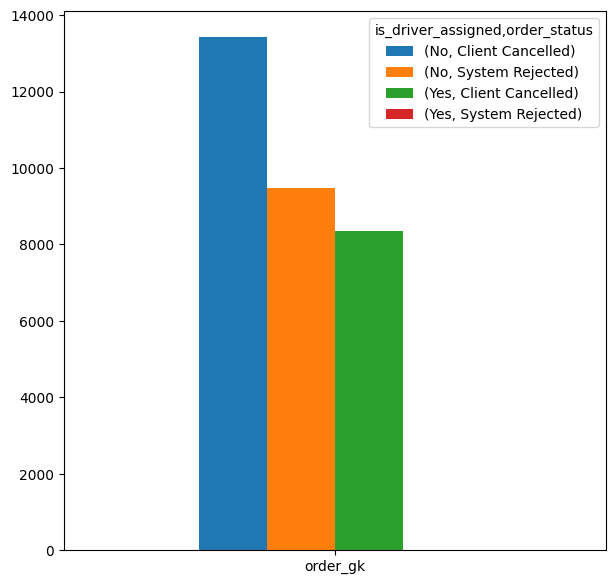

In [177]:
df_q1 = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

In [179]:
df_q1

is_driver_assigned               No                              Yes  \
order_status       Client Cancelled System Rejected Client Cancelled   
order_gk                      13435            9469             8360   

is_driver_assigned                  
order_status       System Rejected  
order_gk                         4

# Question 2
Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [182]:
df['order_hours'] = df['order_time'].str.split(":").apply(lambda split :split[0])

In [184]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hours
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled,12


In [186]:
df.sample(n=10,random_state = 42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hours
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,09
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,02
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Rejected,03
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled,14
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Rejected,20
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled,18
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled,07


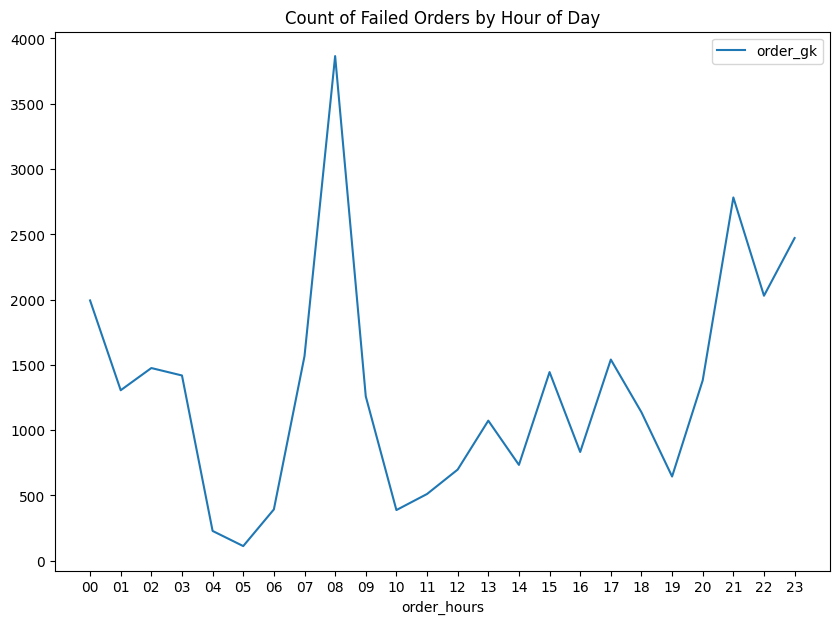

In [192]:
_ = df.groupby(by="order_hours")["order_gk"].count().plot(figsize=(10, 7),
                                                         legend=True,
                                                         xticks=range(0, 24),
                                                         title="Count of Failed Orders by Hour of Day")



In [194]:
grouped_q2 = df.groupby(by=["order_hours", "is_driver_assigned", "order_status"])["order_gk"].count()
grouped_q2

order_hours  is_driver_assigned  order_status    
00           No                  Client Cancelled     957
                                 System Rejected      706
             Yes                 Client Cancelled     326
                                 System Rejected        4
01           No                  Client Cancelled     633
                                                     ... 
22           No                  System Rejected      660
             Yes                 Client Cancelled     415
23           No                  Client Cancelled    1144
                                 System Rejected      883
             Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64

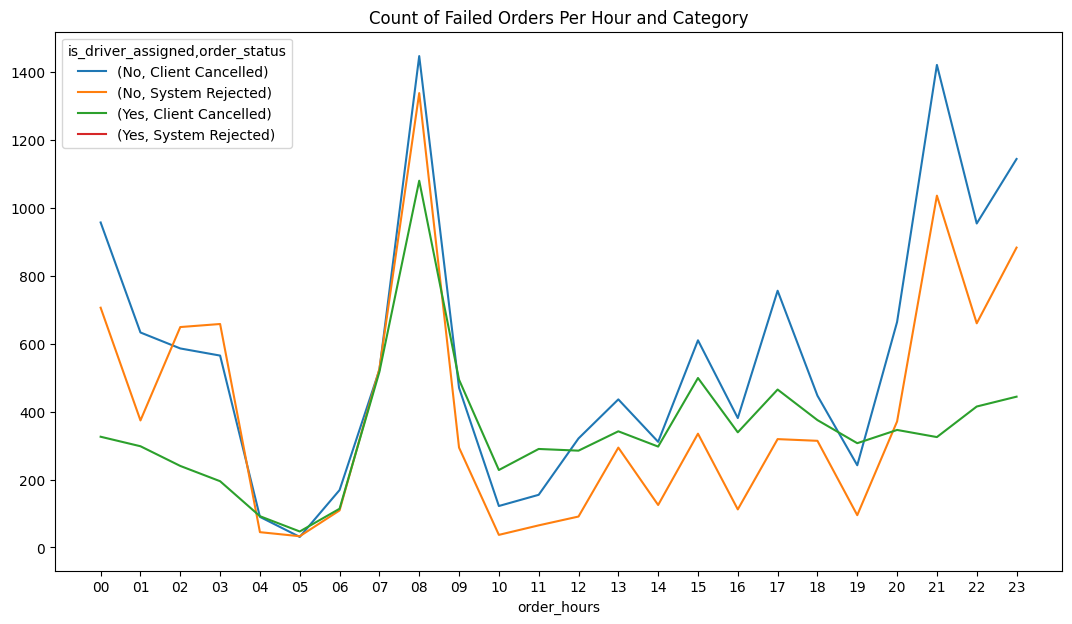

In [196]:
_ = grouped_q2.reset_index().pivot(index="order_hours",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")


# Question 3
Plot the average time to cancellation with and without driver, by hour. Can we draw any conclusions from this plot?

In [199]:
grouped_q3 = df.groupby(by=["order_hours","is_driver_assigned"])["cancellations_time_in_seconds"].mean()

In [201]:
grouped_q3

order_hours  is_driver_assigned
00           No                    115.126437
             Yes                   276.082822
01           No                    100.593997
             Yes                   296.312081
02           No                    121.305461
             Yes                   301.466667
03           No                    129.182301
             Yes                   368.682051
04           No                    100.733333
             Yes                   245.250000
05           No                    102.838710
             Yes                   156.617021
06           No                    202.952663
             Yes                   225.508772
07           No                    141.177820
             Yes                   177.640232
08           No                    132.625432
             Yes                   172.896296
09           No                    138.014894
             Yes                   230.821862
10           No                     93.795082
  

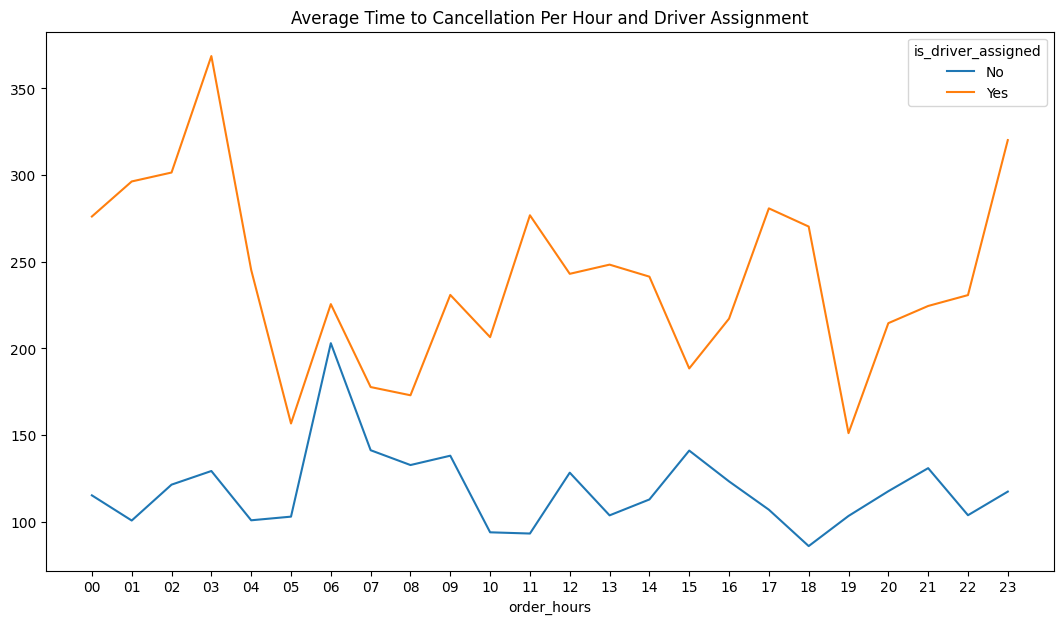

In [205]:
_ = grouped_q3.reset_index().pivot(index="order_hours",
                                   columns="is_driver_assigned",
                                   values="cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                                                figsize=(13, 7),
                                                                                title="Average Time to Cancellation Per Hour and Driver Assignment")

# Question 4
Plot the distribution of average ETA by hours. How can this plot be explained?

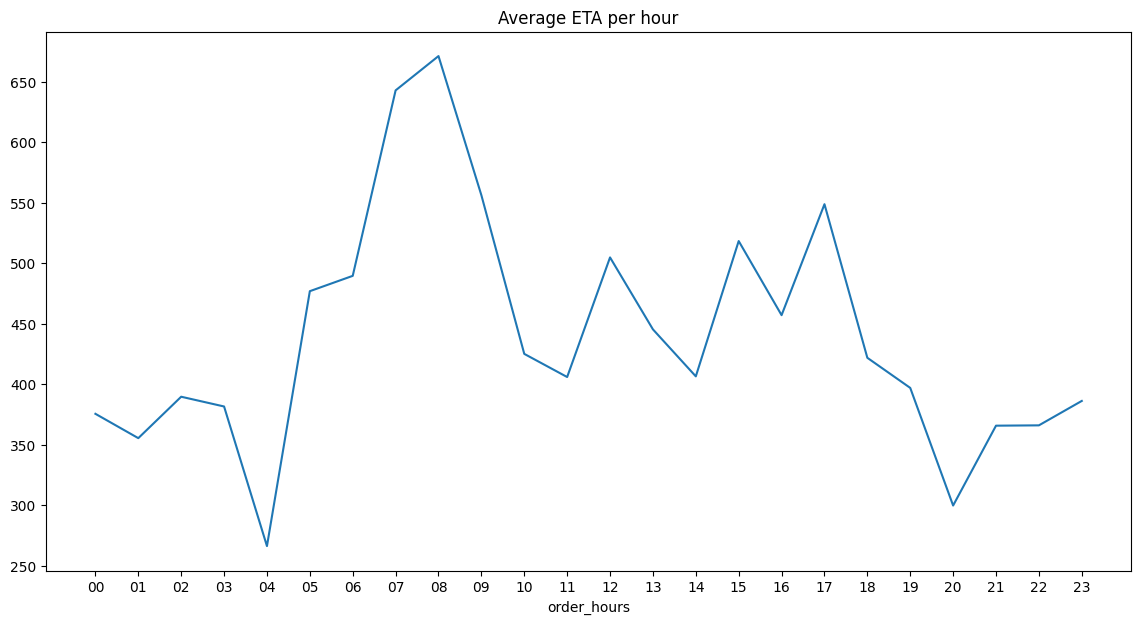

In [210]:
_ = df.groupby(by="order_hours")["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")